<a href="https://colab.research.google.com/github/akashsharma-2002/Multiface_detect/blob/main/Multiface_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python


In [ ]:
!pip install --upgrade opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.7.0.72
    Uninstalling opencv-python-4.7.0.72:
      Successfully uninstalled opencv-python-4.7.0.72


##IMPORTING LIBRARIES

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

##### CV2 IS USED FOR DETECTION AND IMAGE ACCESS AND GOOGLE COLAB PATCHES IS USED FOR UTILIZING IMSHOW() WHICH IS USED TO DISPLAY IMAGE PREDICTED WITHIN THE COLLAB


##CREATING FUNCTION FOR DETECTING FACES

In [22]:
def detect_faces(image_path):

    # Load the pre-trained Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    if face_cascade.empty():
        print("Error: Haar cascade classifier not loaded.")
        return

    # Read the image from the provided path
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Unable to load the image from '{image_path}'. Please make sure the path is correct.")
        return

    # Convert the image to grayscale for face detection (Haar cascades work on grayscale images)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image

    #scaleFactor: This parameter determines how much the image size is reduced at each image scale.
    #minNeighbors: This parameter controls how many neighbors each rectangle should have to retain
    #minSize: This parameter defines the minimum possible size for a detected face.

    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=12, minSize=(30, 30))

    if len(faces) == 0:
        print("No faces were detected in the image.")
        return

    # Draw rectangles around the detected faces on the original image
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the image with detected faces using cv2_imshow (Google Colab compatible)
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### Providing the image path where faces has to be detected

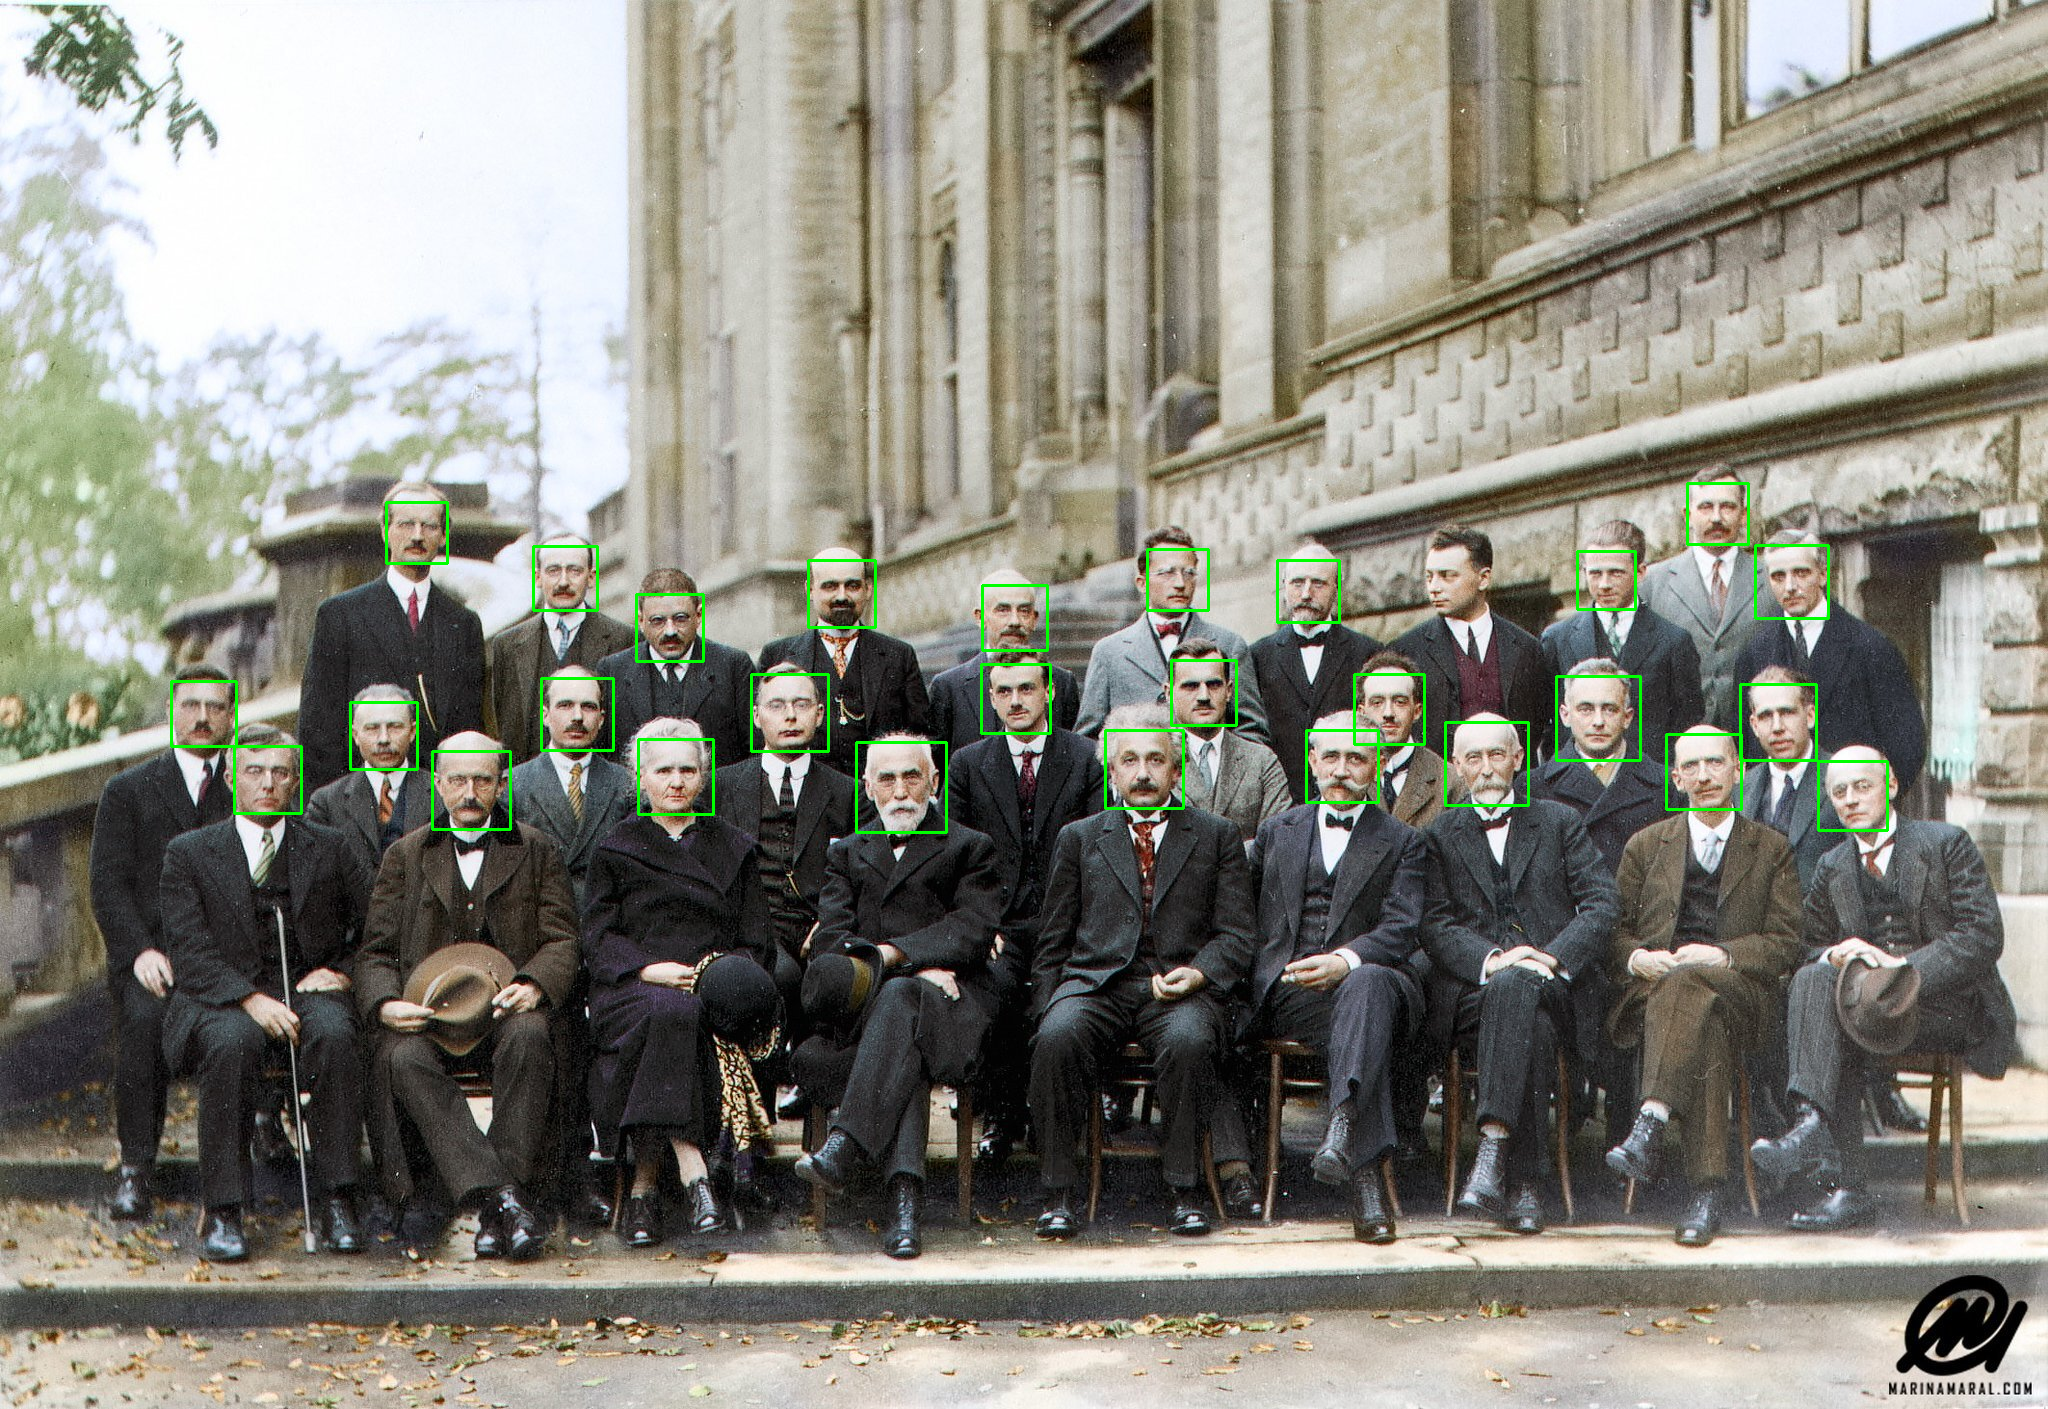

In [23]:
if __name__ == "__main__":
    # Provide the path to the image you uploaded in Google Colab
    image_path = "new_img.jpg"
    detect_faces(image_path)